# WHO Life Expectancy Data Analysis
Based on the data set : https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [56]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

# Load Data Set
colnames = ['country', 'year', 'status','adult_mortality', 'infant_deaths',
            'alcohol', 'percent_expenditure', 'hepatitisB',
            'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
            'diphtheria', 'hiv_aids', 'gdp','population','thinness_1_19','thinness_5_9',
            'income_composition','schooling','life_expectancy']
           
data_set = pd.read_csv('life_expectancy_data.csv',names=colnames)
data_set.head(25)

,country,year,status,adult_mortality,infant_deaths,alcohol,percent_expenditure,hepatitisB,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling,life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
5,Afghanistan,2010,Developing,279.0,74,0.01,79.679367,66.0,1989,16.7,...,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,58.8
6,Afghanistan,2009,Developing,281.0,77,0.01,56.762217,63.0,2861,16.2,...,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,58.6
7,Afghanistan,2008,Developing,287.0,80,0.03,25.873925,64.0,1599,15.7,...,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,58.1
8,Afghanistan,2007,Developing,295.0,82,0.02,10.910156,63.0,1141,15.2,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,57.5
9,Afghanistan,2006,Developing,295.0,84,0.03,17.171518,64.0,1990,14.7,...,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,57.3


Prepare the Dataset

In [57]:
# Clean Data
# Remove Null values

# Check the shape of the data in (rows, columns) format
data_set.shape



(2938, 22)

In [58]:
# Check for all null values in your dataset
data_set.isnull()


,country,year,status,adult_mortality,infant_deaths,alcohol,percent_expenditure,hepatitisB,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling,life_expectancy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# check how many null values are there in each column of the dataset

data_set.isnull().sum()

# Check how many null values are in a specific column

# data_set[col].isnull().sum()

country                  0
year                     0
status                   0
adult_mortality         10
infant_deaths            0
alcohol                194
percent_expenditure      0
hepatitisB             553
measles                  0
bmi                     34
under_five_deaths        0
polio                   19
total_expenditure      226
diphtheria              19
hiv_aids                 0
gdp                    448
population             652
thinness_1_19           34
thinness_5_9            34
income_composition     167
schooling              163
life_expectancy         10
dtype: int64

In [60]:
# Remove rows with empty values

modified_data_set = data_set.dropna()

# check how many null values are there in each column of the dataset

modified_data_set.isnull().sum()

country                0
year                   0
status                 0
adult_mortality        0
infant_deaths          0
alcohol                0
percent_expenditure    0
hepatitisB             0
measles                0
bmi                    0
under_five_deaths      0
polio                  0
total_expenditure      0
diphtheria             0
hiv_aids               0
gdp                    0
population             0
thinness_1_19          0
thinness_5_9           0
income_composition     0
schooling              0
life_expectancy        0
dtype: int64

In [61]:
# Verify descriptive statistics

modified_data_set.describe()

,year,adult_mortality,infant_deaths,alcohol,percent_expenditure,hepatitisB,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling,life_expectancy
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,69.302304
std,4.087711,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,8.796834
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,44.000000
25%,2005.000000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,64.400000
50%,2008.000000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,71.700000
75%,2011.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,75.000000
max,2015.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,89.000000


In [62]:
# Verifying whether data for each variable is according to its dataype or not.

modified_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1649 non-null   object 
 1   year                 1649 non-null   int64  
 2   status               1649 non-null   object 
 3   adult_mortality      1649 non-null   float64
 4   infant_deaths        1649 non-null   int64  
 5   alcohol              1649 non-null   float64
 6   percent_expenditure  1649 non-null   float64
 7   hepatitisB           1649 non-null   float64
 8   measles              1649 non-null   int64  
 9   bmi                  1649 non-null   float64
 10  under_five_deaths    1649 non-null   int64  
 11  polio                1649 non-null   float64
 12  total_expenditure    1649 non-null   float64
 13  diphtheria           1649 non-null   float64
 14  hiv_aids             1649 non-null   float64
 15  gdp                  1649 non-null   f

In [64]:
modified_data_set.head(25)

,country,year,status,adult_mortality,infant_deaths,alcohol,percent_expenditure,hepatitisB,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling,life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
5,Afghanistan,2010,Developing,279.0,74,0.01,79.679367,66.0,1989,16.7,...,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,58.8
6,Afghanistan,2009,Developing,281.0,77,0.01,56.762217,63.0,2861,16.2,...,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,58.6
7,Afghanistan,2008,Developing,287.0,80,0.03,25.873925,64.0,1599,15.7,...,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,58.1
8,Afghanistan,2007,Developing,295.0,82,0.02,10.910156,63.0,1141,15.2,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,57.5
9,Afghanistan,2006,Developing,295.0,84,0.03,17.171518,64.0,1990,14.7,...,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,57.3


Detecting Outliers for each variable


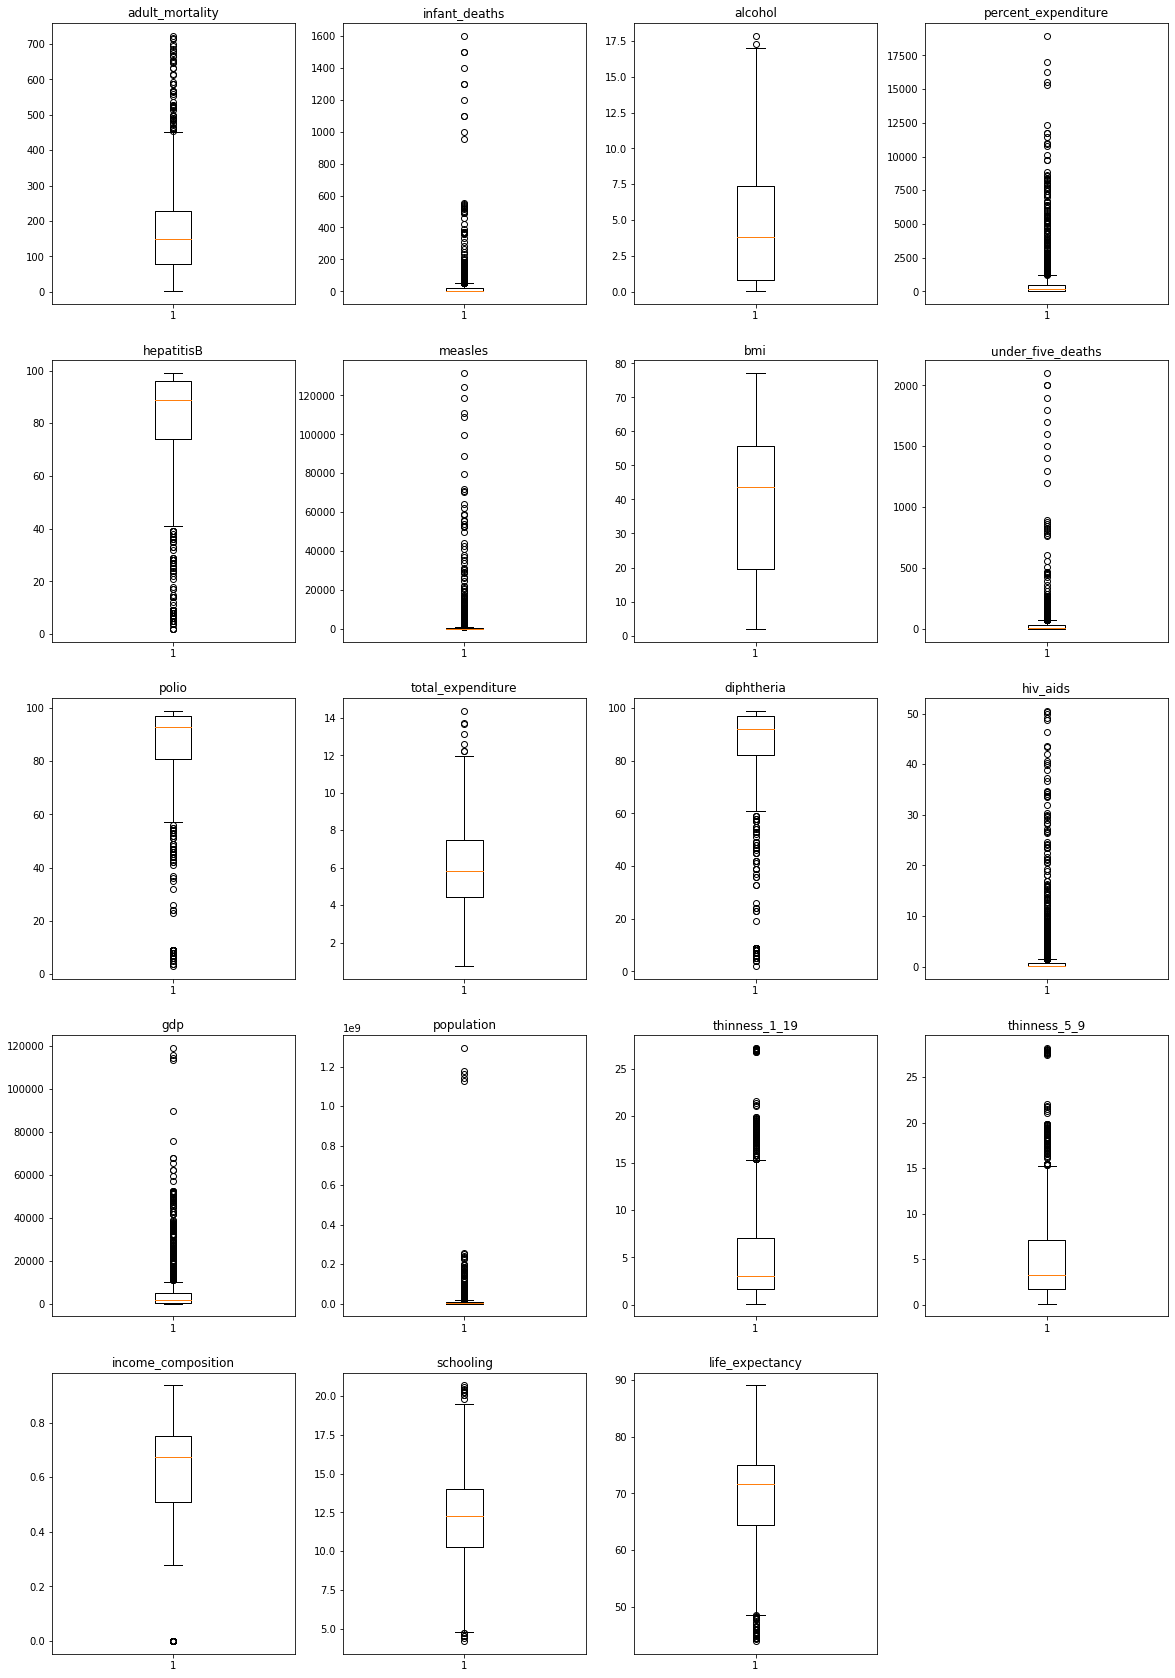

In [66]:
# Create a dictionary of columns.
col_dict = {'adult_mortality':1,'infant_deaths':2,'alcohol':3,'percent_expenditure':4,'hepatitisB':5,
            'measles':6, 'bmi':7,'under_five_deaths':8, 'polio':9,'total_expenditure':10, 'diphtheria':11,
            'hiv_aids':12, 'gdp':13,'population':14,'thinness_1_19':15, 'thinness_5_9':16,
            'income_composition':17,'schooling':18, 'life_expectancy':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(modified_data_set[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [68]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(modified_data_set[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((modified_data_set[variable] > max_val) | 
                                                                                           (modified_data_set[variable] < min_val))[0])),len((np.where((modified_data_set[variable] > max_val) | 
                                                                                           (modified_data_set[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in adult_mortality : 54 and 2.7176648213387016
Number of outliers and percentage of it in infant_deaths : 199 and 10.015098137896326
Number of outliers and percentage of it in alcohol : 2 and 0.10065425264217413
Number of outliers and percentage of it in percent_expenditure : 187 and 9.411172622043281
Number of outliers and percentage of it in hepatitisB : 165 and 8.303975842979366
Number of outliers and percentage of it in measles : 297 and 14.947156517362858
Number of outliers and percentage of it in bmi : 0 and 0.0
Number of outliers and percentage of it in under_five_deaths : 222 and 11.17262204328133
Number of outliers and percentage of it in polio : 142 and 7.146451937594363
Number of outliers and percentage of it in total_expenditure : 7 and 0.3522898842476095
Number of outliers and percentage of it in diphtheria : 134 and 6.743834927025667
Number of outliers and percentage of it in hiv_aids : 299 and 15.047810770005032
Number of outliers 

Univariate Analysis

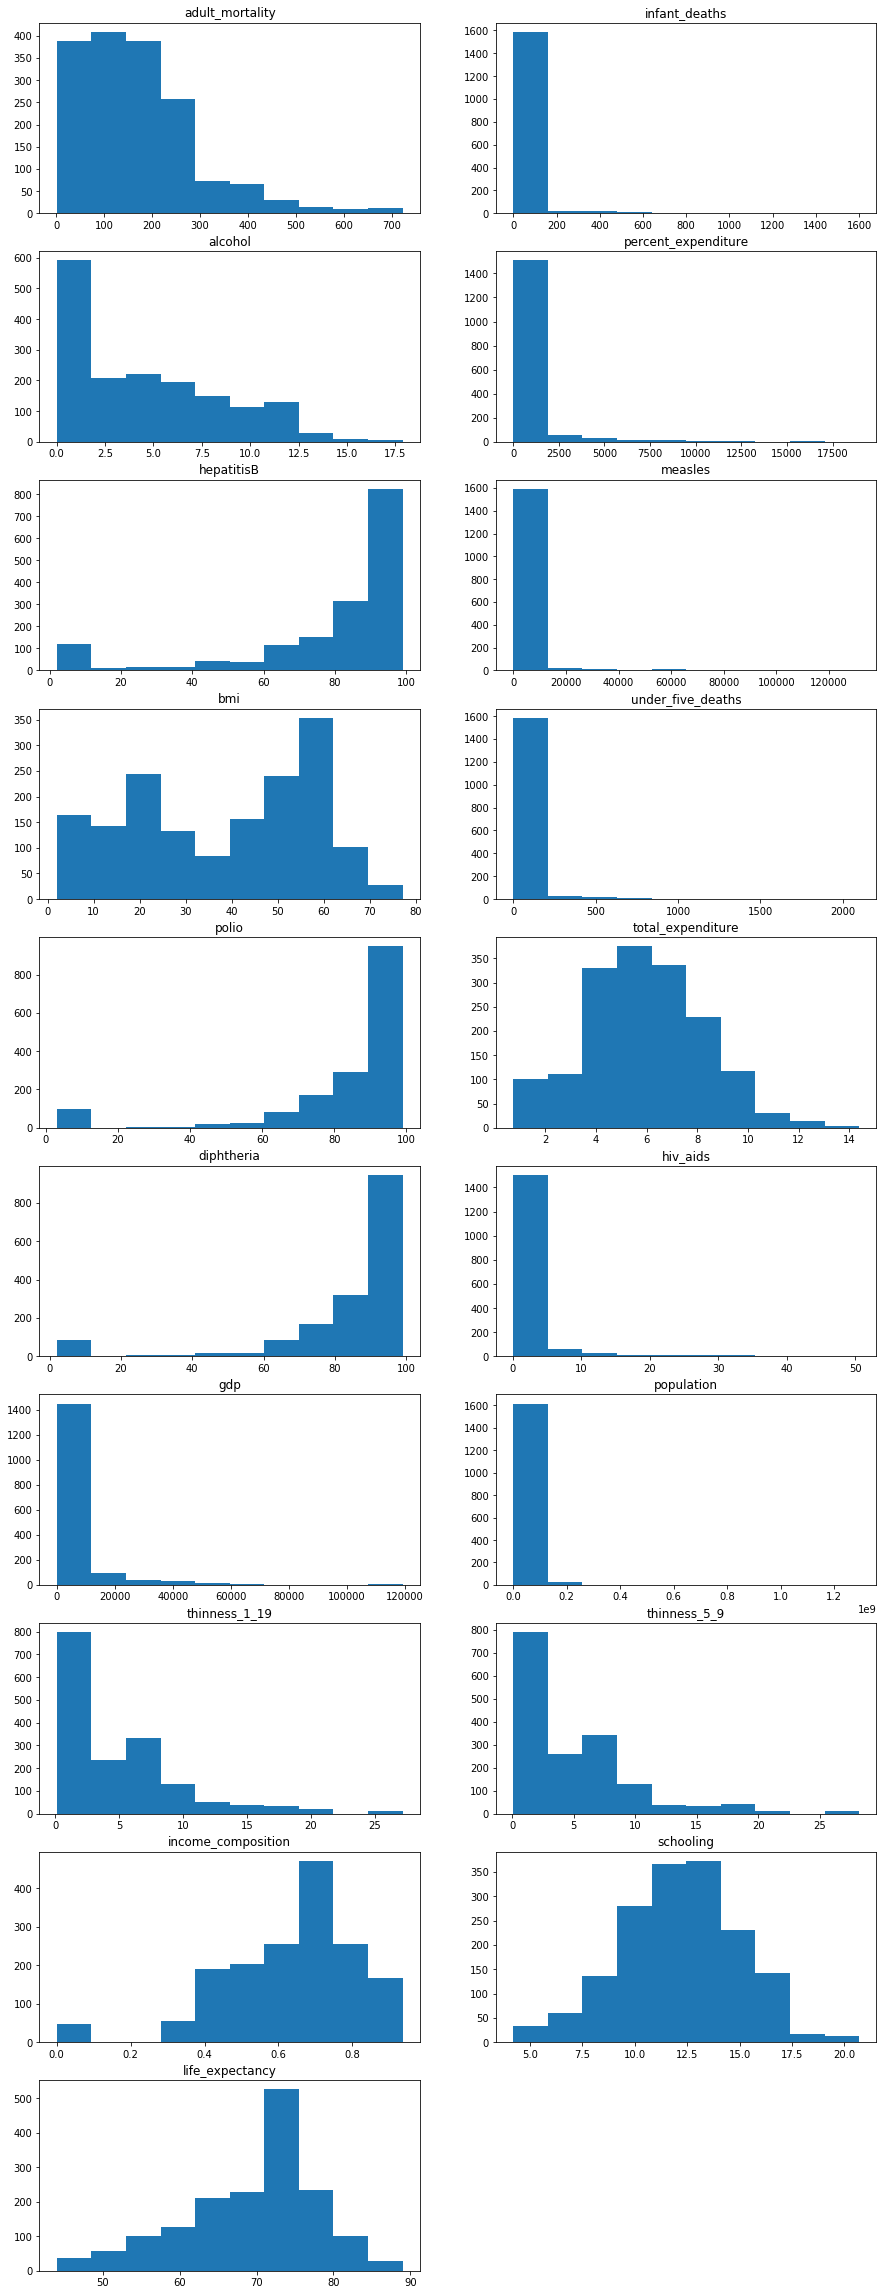

In [69]:
# Distribution of each numerical variable.
all_col = ['adult_mortality','infant_deaths','alcohol','percent_expenditure','hepatitisB',
            'measles', 'bmi','under_five_deaths', 'polio','total_expenditure', 'diphtheria',
            'hiv_aids', 'gdp','population','thinness_1_19', 'thinness_5_9',
            'income_composition','schooling', 'life_expectancy']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(modified_data_set[all_col[i]])
    plt.title(all_col[i])

plt.show()


In [70]:
# Descriptive statistics of categorical variables.

modified_data_set.describe(include=['O'])

,country,status
count,1649,1649
unique,133,2
top,Afghanistan,Developing
freq,16,1407
